# 有限长序列、频谱、DFT的性质

**数字信号处理 3210100658 许展风**

#### 导入必要的库，matplotlib用于作图，numpy用于向量运算

In [ ]:
# Import libs
import matplotlib.pyplot as plt
import numpy as np

#### 编写绘制序列用的函数，以及DFT函数，经验证与numpy库中的fft函数是等效的

In [ ]:
def xshow(n, x, title, xlabel, ylabel):
    ''' 描绘序列, 绘制棒棒糖图(Lollipop Chart)

    :n: 与x等长的自然数序列
    :x: 需要绘制的序列
    :title: 图标题
    :xlabel: x轴标签
    :ylabel: y轴标签
    
    '''
    # plot the chart
    fig, ax = plt.subplots(figsize=(15,4), dpi= 100)
    ax.vlines(x=n, ymin=0, ymax=x, alpha=0.7, linewidth=2)                #plot line
    ax.scatter(x=n, y=x, s=75, alpha=0.7)                                 #plot dots

    # Title, Lable, Ticks, and Ylim
    ax.set_title(title, fontdict={'size':20})      
    ax.set_ylabel(ylabel,fontdict={'size':20})                             
    plt.tick_params(labelsize=20)
    ax.set_xticks(n)                                                       
    ax.set_xlabel(xlabel,fontdict={'size':20})
    if(round(np.min(x),2)<0):
        ax.set_ylim(np.min(x)-0.5,np.max(x)+0.5)
    else:
        ax.set_ylim(0, np.max(x)+0.5)

    # Annotation
    for i,j in zip(n,x):
        ax.text(i, j+.1, s=round(j, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

    plt.show()
    return

def xDft(x, length):
    '''对序列做DFT变换

    :x: 待变换的序列
    :length: 序列长度
    :return Xf: 变换后序列

    '''
    Xf=np.zeros(length, dtype=complex)
    n=np.arange(0,length)
    for k in n:
        for m in n:
            Xf[k]+=x[m]*np.e**(-2*np.pi*1j*m*k/length)
    return Xf


## 2-1-1 实指数序列 

#### 编写用于生成要求实指数序列的函数

In [ ]:
def x1genarate(a1,length1):
    '''生成实指数序列a^n
    :a1: 底数
    :length1: 序列长度
    :return: 实指数序列和对应自然数序列

    '''
    x1 = np.zeros(length1)
    n1 = np.arange(0,length1)
    for i in n1:
        x1[i]=a1**i
    return [x1,n1]


### 实指数序列，第一组参数，生成并画图，实指数序列没有虚部，故省去虚部图、模图、相角图。

In [ ]:
# Param
a1 = 0.5
length1 = 10

# Array genaration
x1, n1=x1genarate(a1,length1)
xshow(n1,x1,'x1[n]=a^n, a=0.5, length=10','n','x1[n]')

# DFT
Xf1=xDft(x1,length1)

# Plot
xshow(n1, np.abs(Xf1), '|DFT(x1[n])|', 'k', '|X[k]|')
xshow(n1, np.real(Xf1),'Real(DFT(x1[n]))', 'k', 'Real(X[k])')
xshow(n1, np.imag(Xf1),'Imag(DFT(x1[n]))', 'k', 'Imag(X[k])')


### 实指数序列，第二组参数，生成并画图，实指数序列没有虚部，故省去虚部图、模图、相角图。

In [ ]:
# Param
a2 = 0.9
length2 = 10

# Data preparation
x2, n2=x1genarate(a2,length2)

xshow(n2,x2,'x2[n]=a^n, a=0.9, length=10','n','x2[n]')

# DFT
Xf2=xDft(x2,length2)

# Plot
xshow(n2, np.abs(Xf2), '|DFT(x2[n])|', 'k', '|X[k]|')
xshow(n2, np.real(Xf2),'Real(DFT(x2[n]))', 'k', 'Real(X[k])')
xshow(n2, np.imag(Xf2),'Imag(DFT(x2[n]))', 'k', 'Imag(X[k])')

### 实指数序列，第三组参数，生成并画图，实指数序列没有虚部，故省去虚部图、模图、相角图。

In [ ]:
# Param
a3 = 0.9
length3 = 20

# Data preparation
x3, n3=x1genarate(a3,length3)

xshow(n3, x3, 'x3[n]=a^n, a=0.9, length=20', 'n', 'x3[n]')

# DFT
Xf3=xDft(x3, length3)

# Plot
xshow(n3, np.abs(Xf3), '|DFT(x3[n])|', 'k', '|X3[k]|')
xshow(n3, np.real(Xf3),'Real(DFT(x3[n]))', 'k', 'Real(X3[k])')
xshow(n3, np.imag(Xf3),'Imag(DFT(x3[n]))', 'k', 'Imag(X3[k])')

## 2-1-2 复指数序列 a=0.5, b=0.8, length=10

In [ ]:
# Param
a4=0.5
b4=0.8
length4=10

# Data genaration
n4 = np.arange(0, length4)
x4 = np.zeros(length4, dtype=complex)
for i in n4:
    x4[i] = complex(a4,b4)**i

# Plot
xshow(n4, np.real(x4), 'Real(x4[n])=Real[(a+bj)^n]\na=0.5, b=0.8, length=10', 'n', 'Real(x4[n])')
xshow(n4, np.imag(x4), 'Imag(x4[n])=Imag[(a+bj)^n]\na=0.5, b=0.8, length=10', 'n', 'Imag(x4[n])')
xshow(n4, np.abs(x4), '|x4[n]|=|(a+bj)^n|\n a=0.5, b=0.8, length=10', 'n', '|x4[n]|')
xshow(n4, np.angle(x4), 'angle(x4[n])=angle[(a+bj)^n]\na=0.5, b=0.8, length=10', 'n', 'angle(x4[n])')

# DFT
Xf4=xDft(x4, length4)

# Plot
xshow(n4, np.abs(Xf4), '|DFT(x4[n])|', 'k', '|X4[k]|')
xshow(n4, np.real(Xf4),'Real(DFT(x4[n]))', 'k', 'Real(X4[k])')
xshow(n4, np.imag(Xf4),'Imag(DFT(x4[n]))', 'k', 'Imag(X4[k])')



## 2-1-3 从正弦信号中抽样，f=1Hz, $\psi$=0, T=0.1, length=10

In [ ]:
# Param
f5=1
psi5=0
T5=0.1
length5=20

# Data preparation
n5 = np.arange(0,length5)
x5 = np.zeros(length5)
for i in n5:
    if(i<10):
        x5[i] = np.sin(2*np.pi*f5*i*T5+psi5)

# Plot
xshow(n5, x5, '$x_5[n]=sin(2 \pi fnT+ \psi ), f=1, \psi=0, T=0.1, length=10$', 'n', 'x5[n]')

# DFT
Xf5=xDft(x5, length5)

# Plot
xshow(n5, np.abs(Xf5), '|DFT(x5[n])|', 'k', '|X5[k]|')
xshow(n5, np.real(Xf5),'Real(DFT(x5[n]))', 'k', 'Real(X5[k])')
xshow(n5, np.imag(Xf5),'Imag(DFT(x5[n]))', 'k', 'Imag(X5[k])')


## 2-1-4 从余弦信号抽样 f=1， $\psi$=0, T=0.1, length=10

In [ ]:
# Param
f6=1
psi6=0
T6=0.1
length6=10

# Data preparation
n6 = np.arange(0,length6)
x6 = np.zeros(length6)
for i in n6:
    x6[i] = np.cos(2*np.pi*f6*i*T6+psi6)

# Plot
xshow(n6, x6, 'x6[n]=cos(2*pi*f*n*T+psi), f=1, psi=0, T=0.1, length=10', 'n', 'x6[n]')

# DFT
Xf6=xDft(x6, length6)

# Plot
xshow(n6, np.abs(Xf6), '|DFT(x6[n])|', 'k', '|X6[k]|')
xshow(n6, np.real(Xf6),'Real(DFT(x6[n]))', 'k', 'Real(X6[k])')
xshow(n6, np.imag(Xf6),'Imag(DFT(x6[n]))', 'k', 'Imag(X6[k])')


## 2-1-5 生成含两个频率分量的复合函数序列

### 编写生成符合函数序列的函数

In [ ]:

def x7generate(f1, f2, deta, psi, T, length):
    '''生成含有两个频率分量的复合函数序列
    
    :f1: 分量1的频率
    :f2: 分量2的频率
    :deta: 相对振幅
    :psi:初相位
    :T: 抽样间隔
    :length: 序列长
    :return x: 生成的序列
    :return n: 和生成序列等长的自然数列
    '''   
    n = np.arange(0, length)
    x = np.zeros(length)
    for i in n:
        x[i] = np.sin(2*np.pi*f1*i*T)+deta*np.sin(2*np.pi*f2*i*T+psi)
    return [x,n]


### 根据第一组参数生成并分析序列

In [ ]:
# Param
f71=1
f72=3
deta7=0.5
psi7=0
T7=0.1
length7=10

# Data preparation
x7,n7=x7generate(f71, f72, deta7, psi7, T7, length7)

# Plot
xshow(n7, x7, 'x7[n]=sin(2*pi*f1*n*T)+deta*sin(2*pi*f2*n*T+psi), \n f1=1, f2=3, deta=0.5, psi=0, T=0.1, length=10', 'n', 'x7[n]')

# DFT
Xf7=xDft(x7, length7)

# Plot
xshow(n7, np.abs(Xf7), '|DFT(x7[n])|', 'k', '|X7[k]|')
xshow(n7, np.real(Xf7),'Real(DFT(x7[n]))', 'k', 'Real(X7[k])')
xshow(n7, np.imag(Xf7),'Imag(DFT(x7[n]))', 'k', 'Imag(X7[k])')

### 根据第二组参数生成并分析序列

In [ ]:
# Param
f81=1
f82=3
deta8=0.5
psi8=np.pi/2
T8=0.1
length8=10

# Data preparation
x8,n8=x7generate(f81, f82, deta8, psi8, T8, length8)

# Plot
xshow(n8, x8, 'x8[n]=sin(2*pi*f1*n*T)+deta*sin(2*pi*f2*n*T+psi), \n f1=1, f2=3, deta=0.5, psi=pi/2, T=0.1, length=10', 'n', 'x7[n]')

# DFT
Xf8=xDft(x8, length8)

# Plot
xshow(n8, np.abs(Xf8), '|DFT(x8[n])|', 'k', '|X8[k]|')
xshow(n8, np.real(Xf8),'Real(DFT(x8[n]))', 'k', 'Real(X8[k])')
xshow(n8, np.imag(Xf8),'Imag(DFT(x8[n]))', 'k', 'Imag(X8[k])')

### 根据第三组参数生成并分析序列

In [ ]:
# Param
f91=1
f92=3
deta9=0.5
psi9=np.pi
T9=0.1
length9=10

# Data preparation
x9, n9=x7generate(f91, f92, deta9, psi9, T9, length9)

# Plot
xshow(n9, x9, 'x9[n]=sin(2*pi*f1*n*T)+deta*sin(2*pi*f2*n*T+psi), \n f1=1, f2=3, deta=0.5, psi=pi, T=0.1, length=10', 'n', 'x9[n]')

# DFT
Xf9=xDft(x9, length9)

# Plot
xshow(n9, np.abs(Xf9) , '|DFT(x9[n])|', 'k', '|X9[k]|')
xshow(n9, np.abs(np.fft.fftshift(Xf9)), '|DFT(x9[n])|', 'k', '|X9[k]|')
xshow(n9, np.real(Xf9),'Real(DFT(x9[n]))', 'k', 'Real(X9[k])')
xshow(n9, np.imag(Xf9),'Imag(DFT(x9[n]))', 'k', 'Imag(X9[k])')

In [30]:
def hf(n):
    return (0.5 - 0.5 * np.cos(n * np.pi / 28)) * (np.sin(
        (n - 28) * 51 * np.pi / 160) / (n - 28) / np.pi + np.sin(
            (n - 28) * np.pi) / (n - 28) / np.pi - np.sin(
                (n - 28) * 109 * np.pi / 160) / (n - 28) / np.pi)


In [43]:
8/28*17

4.857142857142857

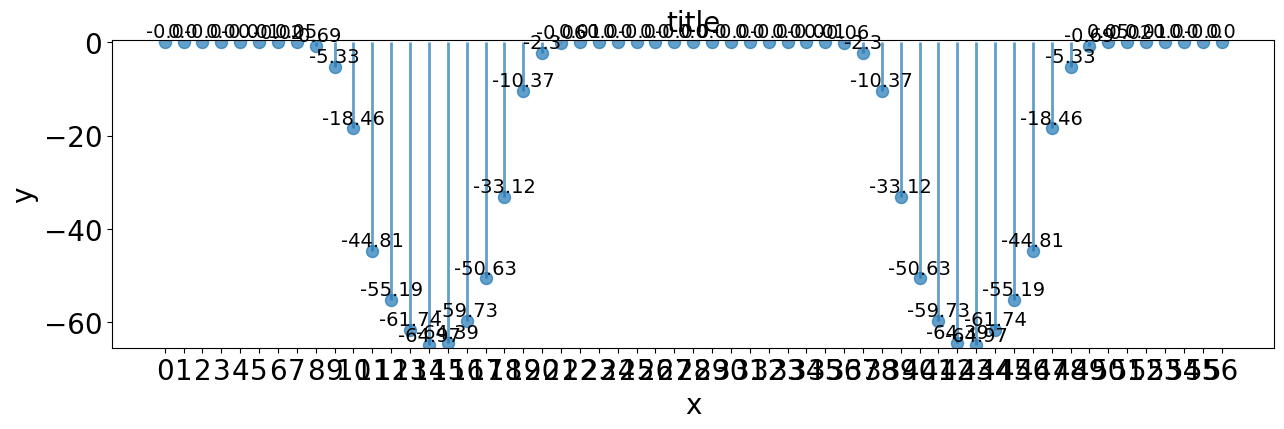

In [37]:
hn = []
for n in range(0,57):
    if(n!=28):
        hn.append(hf(n))
    else:
        hn.append(51/80)
hw = xDft(hn,57)
xshow(range(0,57),hn,'title','x','y')